<a href="https://colab.research.google.com/github/Meghanamajji/Meghana/blob/main/retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()

Saving retail_object_detection.zip to retail_object_detection.zip


In [3]:
import zipfile
import os

# Unzip the file
zip_path = "/content/retail_object_detection.zip"
extract_dir = "/content/retail_object_detection"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files to verify
os.listdir(extract_dir)


['retail_object_detection']

In [4]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install requirements
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.66 MiB | 26.00 MiB/s, done.
Resolving deltas: 100% (11998/11998), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 

In [5]:
import os
os.listdir("/content/retail_object_detection")

['retail_object_detection']

In [6]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


CUDA available: True
Device name: Tesla T4


In [7]:
%cd yolov5  # Navigate into yolov5 folder
!pip install -r requirements.txt  # Install required packages

[Errno 2] No such file or directory: 'yolov5 # Navigate into yolov5 folder'
/content/yolov5


In [8]:
import os
os.environ['WANDB_MODE'] = 'disabled'


In [9]:
!find /content -type d -name "images"


/content/yolov5/data/images
/content/retail_object_detection/retail_object_detection/datasets/ceral_dataset/test/images
/content/retail_object_detection/retail_object_detection/datasets/ceral_dataset/train/images
/content/retail_object_detection/retail_object_detection/datasets/ceral_dataset/valid/images
/content/retail_object_detection/retail_object_detection/datasets/water_bottle/test/images
/content/retail_object_detection/retail_object_detection/datasets/water_bottle/train/images
/content/retail_object_detection/retail_object_detection/datasets/water_bottle/valid/images
/content/retail_object_detection/retail_object_detection/datasets/soda_dataset/test/images
/content/retail_object_detection/retail_object_detection/datasets/soda_dataset/train/images
/content/retail_object_detection/retail_object_detection/datasets/soda_dataset/valid/images
/content/retail_object_detection/retail_object_detection/merge_datasets/images


In [10]:
!ls /content/retail_object_detection/retail_object_detection/merge_datasets/images


test  train  valid


In [11]:
!mv /content/retail_object_detection/retail_object_detection/merge_datasets/images/valid /content/retail_object_detection/retail_object_detection/merge_datasets/images/val


In [12]:
yaml_content = """
train: /content/retail_object_detection/retail_object_detection/merge_datasets/images/train
val: /content/retail_object_detection/retail_object_detection/merge_datasets/images/val
test: /content/retail_object_detection/retail_object_detection/merge_datasets/images/test

nc: 3
names: ['cereal_box', 'soda_can', 'water_bottle']
"""
with open("data.yaml", "w") as f:
    f.write(yaml_content.strip())

print("✅ Updated data.yaml successfully.")


✅ Updated data.yaml successfully.


In [13]:
!python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --name retail_model3


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      33/49      4.55G    0.02624    0.01504  0.0008136         46        640:  15% 22/145 [00:07<00:51,  2.38it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      33/49      4.55G    0.02614    0.01498  0.0007908         57        640:  16% 23/145 [00:07<00:49,  2.49it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      33/49      4.55G    0.02584    0.01503  0.0007672         56        640:  17% 24/145 [00:08<01:01,  1.96it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

In [14]:
!ls /content/retail_object_detection/retail_object_detection/datasets/soda_dataset/valid/labels
!ls /content/retail_object_detection/retail_object_detection/datasets/water_bottle/valid/labels
!ls /content/retail_object_detection/retail_object_detection/datasets/ceral_dataset/valid/labels


20230809_122256_mov-11_jpg.rf.ea97a2ea3af48bae2e3b3e96a03ad6ec.txt
20230809_122256_mov-132_jpg.rf.623bab346001ed0a79711efb86877c43.txt
20230809_122256_mov-178_jpg.rf.6faf783e4f945063e911d399fb88f616.txt
20230809_122256_mov-180_jpg.rf.b5336aefdc857825d236016fd551da61.txt
20230809_122256_mov-181_jpg.rf.02b114ae92a12585134d777db7bed9b6.txt
20230809_122256_mov-183_jpg.rf.bd8e20885df0a0d5b5891f41b503faad.txt
20230809_122256_mov-185_jpg.rf.fbbe56efff99c52f531406a34fe0e758.txt
20230809_122256_mov-188_jpg.rf.a0033afc4cbce1c33c048cd5c28510da.txt
20230809_122256_mov-191_jpg.rf.7bccf672e2116c949bc798600e8f6273.txt
20230809_122256_mov-192_jpg.rf.9694354497a193ff1515c6d891c083f1.txt
20230809_122256_mov-1_jpg.rf.5e6f65716a5570fee37126b7295a7290.txt
20230809_122256_mov-20_jpg.rf.d35566e7a465cd5a225fb4e76ae65796.txt
20230809_122256_mov-224_jpg.rf.fcb598e7cd6e5c4dbdf87a7dddfccebf.txt
20230809_122256_mov-225_jpg.rf.3c4bdb85fedcf50874df471464686839.txt
20230809_122256_mov-226_jpg.rf.4b5050d5c13a0327f387b

In [15]:
# Create correct path
!mkdir -p /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val

# Copy all label .txt files into that path
!cp /content/retail_object_detection/retail_object_detection/datasets/soda_dataset/valid/labels/* \
    /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val/

!cp /content/retail_object_detection/retail_object_detection/datasets/water_bottle/valid/labels/* \
    /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val/

!cp /content/retail_object_detection/retail_object_detection/datasets/ceral_dataset/valid/labels/* \
    /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val/


In [16]:
!python val.py --data data.yaml --weights runs/train/retail_model3/weights/best.pt --img 640


val: data=data.yaml, weights=['runs/train/retail_model3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val... 129 images, 0 backgrounds, 0 corrupt: 100% 129/129 [00:00<00:00, 880.64it/s]
val: New cache created: /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:04<00:00,  1.03it/s]
                   all        129        188  

In [17]:
# cereal_box (class 0)
!grep -h '^0 ' /content/retail_object_detection/retail_object_detection/merge_datasets/labels/train/*.txt | wc -l

# soda_can (class 1)
!grep -h '^1 ' /content/retail_object_detection/retail_object_detection/merge_datasets/labels/train/*.txt | wc -l

# water_bottle (class 2)
!grep -h '^2 ' /content/retail_object_detection/retail_object_detection/merge_datasets/labels/train/*.txt | wc -l


2127
354
1560


In [18]:
# Class 0 - cereal_box
!grep -h '^0 ' /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val/*.txt | wc -l

# Class 1 - soda_can
!grep -h '^1 ' /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val/*.txt | wc -l

# Class 2 - water_bottle
!grep -h '^2 ' /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val/*.txt | wc -l


362
0
0


In [19]:
import os
import shutil
from pathlib import Path

# Paths (adjust if needed)
base_path = Path("/content/retail_object_detection/retail_object_detection/merge_datasets")
train_labels = base_path / "labels/train"
train_images = base_path / "images/train"
val_labels = base_path / "labels/val"
val_images = base_path / "images/val"

# Ensure validation folders exist
val_labels.mkdir(parents=True, exist_ok=True)
val_images.mkdir(parents=True, exist_ok=True)

# Target: 10 samples per class (soda_can=1, water_bottle=2)
target_per_class = 10
moved = {1: 0, 2: 0}

for label_file in train_labels.glob("*.txt"):
    if moved[1] >= target_per_class and moved[2] >= target_per_class:
        break

    with open(label_file, "r") as f:
        content = f.read()

    classes_in_file = {int(line.split()[0]) for line in content.strip().split("\n") if line}

    for cls in [1, 2]:  # soda_can and water_bottle
        if cls in classes_in_file and moved[cls] < target_per_class:
            img_filename = label_file.name.replace(".txt", ".jpg")
            src_label = train_labels / label_file.name
            src_image = train_images / img_filename
            dst_label = val_labels / label_file.name
            dst_image = val_images / img_filename

            if src_image.exists():
                shutil.move(src_label, dst_label)
                shutil.move(src_image, dst_image)
                moved[cls] += 1
                print(f"Moved {label_file.name} for class {cls}")
            break  # only move once per file

print("✅ Done rebalancing validation set:")
print(f"Moved {moved[1]} soda_can and {moved[2]} water_bottle samples.")


Moved 300011_jpg.rf.4354dff3e0138524887b593ee778b1e1.txt for class 2
Moved 100150_jpg.rf.e6c560e47af668caa676be314285bf4e.txt for class 2
Moved 100024_jpg.rf.75632f7b8aa603786f95b65ad0e63860.txt for class 2
Moved 20230809_122256_mov-80_jpg.rf.97e813745563655504142c4c05744d13.txt for class 1
Moved 200045_jpg.rf.783c2dcc114d48495360e2811a389006.txt for class 2
Moved 20230809_122256_mov-131_jpg.rf.17a183bf38f9440dd42eb774d98589d5.txt for class 1
Moved 500424_jpg.rf.ae75dd72b6a5fbeef740826a3afe549c.txt for class 2
Moved 400023_jpg.rf.1c1fce31a96b3df93cd817feba1a3e4e.txt for class 2
Moved 300303_jpg.rf.565da6cd29a0c297d1d94370625c9c92.txt for class 2
Moved 20230809_122256_mov-2_jpg.rf.94e688ca60b53ea17324254765450452.txt for class 1
Moved 300036_jpg.rf.d829c5668c7cae78765c6c4b0f8194f4.txt for class 2
Moved 200371_jpg.rf.a9a3db7beab4c513fdd76b271de0d163.txt for class 2
Moved 200000_jpg.rf.e5e4c9457fb620604606c30a5f70e24b.txt for class 2
Moved 20230809_122256_mov-234_jpg.rf.39086569c2feabbcd6

In [20]:
!python val.py --data data.yaml --weights runs/train/retail_model3/weights/best.pt --img 640


val: data=data.yaml, weights=['runs/train/retail_model3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val... 149 images, 0 backgrounds, 0 corrupt: 100% 149/149 [00:00<00:00, 1142.94it/s]
val: New cache created: /content/retail_object_detection/retail_object_detection/merge_datasets/labels/val.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:04<00:00,  1.24it/s]
                   all        149        215 

In [21]:
from collections import Counter
import os

label_path = "/content/retail_object_detection/retail_object_detection/merge_datasets/labels/train"
counter = Counter()
for f in os.listdir(label_path):
    with open(os.path.join(label_path, f)) as file:
        for line in file:
            cls_id = line.strip().split()[0]
            counter[cls_id] += 1
print(counter)


Counter({'0': 2127, '2': 1546, '1': 341})


In [22]:
import torch
from pathlib import Path
import cv2
from PIL import Image

# --- Config ---
MODEL_PATH = "runs/train/retail_model3/weights/best.pt"
IMAGE_DIR = "/content/retail_object_detection/retail_object_detection/merge_datasets/images/test"
OUTPUT_DIR = "runs/inference_results"
CONF_THRES = 0.25
IMG_SIZE = 640

# --- Load model ---
model = torch.hub.load("ultralytics/yolov5", "custom", path=MODEL_PATH, trust_repo=True)
model.conf = CONF_THRES
model.iou = 0.45
model.classes = None
model.imgsz = IMG_SIZE

# --- Create output dir ---
Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

# --- Run inference ---
image_paths = list(Path(IMAGE_DIR).glob("*.jpg"))
print(f"Running inference on {len(image_paths)} images...")

for img_path in image_paths:
    results = model(str(img_path))
    rendered = results.render()[0]  # numpy array (RGB)

    # Save with OpenCV (convert RGB to BGR)
    output_path = Path(OUTPUT_DIR) / img_path.name
    cv2.imwrite(str(output_path), rendered[:, :, ::-1])

print("✅ Inference completed. Results saved to:", OUTPUT_DIR)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-7-26 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Running inference on 112 images...


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

✅ Inference completed. Results saved to: runs/inference_results


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [23]:
import os

inference_dir = "runs/inference_results"
print(os.listdir(inference_dir))


['700304_jpg.rf.da88b3ae9520d9bdf2b4c61c683bfe7b.jpg', 'images59_jpg.rf.3e9afd41392d3c82950b5af46715873f.jpg', 'images41_jpg.rf.6d1aba71728c8119e404faa0c1192429.jpg', '600138_jpg.rf.cfe31740ef565915cf710d36bc13f15e.jpg', '700301_jpg.rf.69d23b33a1ee7c06a92daf93dc398431.jpg', '700274_jpg.rf.334a103c83ebdb12b105499c057cd12a.jpg', 'images61_jpg.rf.3002e3ba26a255e642a6ffb448ff8680.jpg', '20230809_122256_mov-0_jpg.rf.5a84660f34ef70c773478954ab3a5309.jpg', '20230809_122256_mov-227_jpg.rf.2cadafce60f518404f7d2efe5022f532.jpg', '600037_jpg.rf.5c52731792835bf224be9cc4f694de2c.jpg', 'image31_jpeg.rf.156c20196a504d06d8e36ebea5910c71.jpg', 'images80_jpg.rf.730882c17e22d04e8a8fe764334c14ab.jpg', 'D_883562-MLM46373631038_062021-B_773c2e57-54b9-4020-b963-8e8d27ce3ebf_1200x1200_jpg.rf.11213412fe675a6e0857f0d720785dcc.jpg', 'images64_jpg.rf.ee475cde613ab2c5857e835fe7f44e0d.jpg', '500749_jpg.rf.f3d84e9667e9be6208b5a68eac12629a.jpg', '600018_jpg.rf.5d8d5839749b5a39b7a72ecb905d2bfa.jpg', '700024_jpg.rf.eae

In [24]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Directory where inference result images are stored
image_dir = "runs/inference_results"

# Pick 5 random image filenames
all_images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg', '.webp'))]
sample_images = random.sample(all_images, 5)

# Plot them
plt.figure(figsize=(15, 10))
for i, img_file in enumerate(sample_images):
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{img_file[:15]}...")

plt.tight_layout()
plt.show()


In [25]:
import shutil

target_dir = "sample_results"
os.makedirs(target_dir, exist_ok=True)

for img_file in sample_images:
    shutil.copy(os.path.join(image_dir, img_file), os.path.join(target_dir, img_file))

print(f"✅ Copied {len(sample_images)} images to {target_dir}")


✅ Copied 5 images to sample_results


In [26]:
import os

sample_dir = "sample_results"
images = [f for f in os.listdir(sample_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print("Images in sample_results:", images)


Images in sample_results: ['images41_jpg.rf.6d1aba71728c8119e404faa0c1192429.jpg', '20230809_122256_mov-26_jpg.rf.75d3b541b7c9437d55ade55b98464293.jpg', '600010_jpg.rf.c7bc668a81a54a039b2f4db3a9c8fac2.jpg', '700071_jpg.rf.5232e795342f8707fb1cc99b14def967.jpg', '700059_jpg.rf.34cbd8e32dd3cc35d42be36c58fe2abd.jpg']


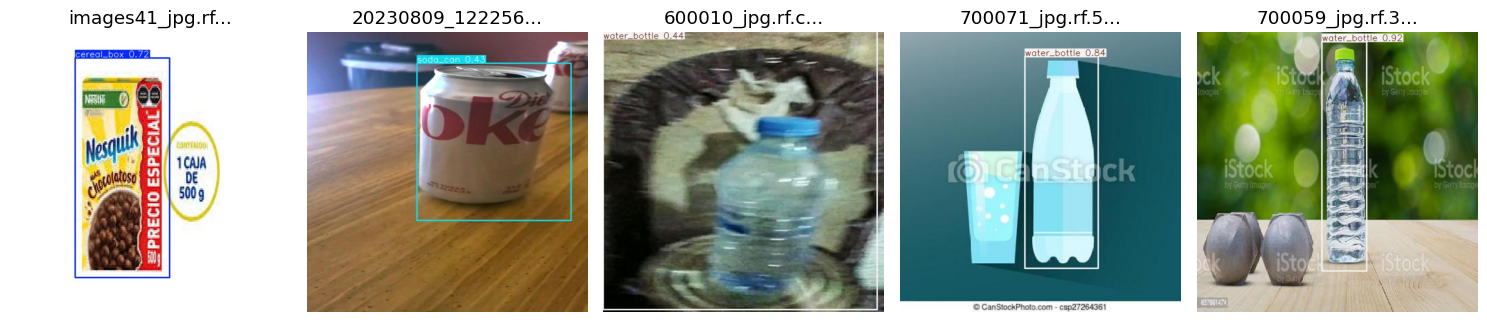

In [28]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

# Directory with results
sample_dir = "sample_results"
images = [f for f in os.listdir(sample_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Plot 5 images
plt.figure(figsize=(15, 10))
for i, img_file in enumerate(images[:5]):  # ✅ This line restricts to 5 images
    img_path = os.path.join(sample_dir, img_file)
    img = Image.open(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_file[:15] + "...")
plt.tight_layout()
plt.show()

In [29]:
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.60 MiB | 29.37 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.


In [30]:
!pip install gradio --quiet

import gradio as gr
from PIL import Image
import torch

# Load your trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/retail_model3/weights/best.pt', trust_repo=True)

# Define prediction function
def detect_objects(image):
    results = model(image)
    img = results.render()[0]
    return Image.fromarray(img)

# Launch Gradio UI
gr.Interface(fn=detect_objects, inputs=gr.Image(type="pil"), outputs="image", title="Retail Object Detector").launch()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-7-26 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://db99ba1aadef3e1167.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [31]:
import os

for root, dirs, files in os.walk("/content"):
    for file in files:
        if file.endswith("best.pt"):
            print(os.path.join(root, file))


/content/yolov5/runs/train/retail_model3/weights/best.pt


In [32]:
%cd /content/yolov5
!python export.py --weights /content/yolov5/runs/train/retail_model3/weights/best.pt --include torchscript --dynamic --int8


/content/yolov5
export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/retail_model3/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=True, per_tensor=False, dynamic=True, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/retail_model3/weights/best.pt with output shape (1, 25200, 8) (13.8 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 2.5s, saved as /content/yolov5/runs/train/retail_model3/weights/best.torchscript (27.0 MB)

Export complete (3.7s)
Results saved to /content/yolov5/runs/train/retail_model3/we

In [33]:
from pathlib import Path
import torch
import cv2

# Load model
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/yolov5/runs/train/retail_model3/weights/best.pt')
model.conf = 0.25

input_folder = Path('/content/domain_shift_test')
output_folder = Path('/content/domain_shift_results')
output_folder.mkdir(parents=True, exist_ok=True)

for img_path in input_folder.glob("*.jpg"):
    results = model(str(img_path))
    rendered = results.render()[0]
    out_path = output_folder / img_path.name
    cv2.imwrite(str(out_path), rendered[:, :, ::-1])

print(f"✅ Results saved to {output_folder}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-7-26 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


✅ Results saved to /content/domain_shift_results
